Perform Classification on Campus Recruitment

Tasks
1. Build a model that predicts if student gets placed
2. Simple Linear Regression

In [81]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

from collections import defaultdict, Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Campus Recruitment - Classification\Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [6]:
round(df.describe(), 2)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,148.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,288655.41
std,62.21,10.83,10.90,7.36,13.28,5.83,93457.45
min,1.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,54.50,60.60,60.90,61.00,60.00,57.94,240000.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,161.50,75.70,73.00,72.00,83.50,66.26,300000.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


In [8]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
df["salary"] = df["salary"].replace(np.nan, 0)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [12]:
round(df.describe(), 2)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,215.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,198702.33
std,62.21,10.83,10.90,7.36,13.28,5.83,154780.93
min,1.00,40.89,37.00,50.00,50.00,51.21,0.00
25%,54.50,60.60,60.90,61.00,60.00,57.94,0.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,240000.00
75%,161.50,75.70,73.00,72.00,83.50,66.26,282500.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [82]:
X = df.drop(columns = "status")

le = LabelEncoder()
X = X.apply(le.fit_transform)

y = df[["status"]]


model = DecisionTreeClassifier()
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pred = model.predict(X_train)
#print("Prediction Outcome :", pred)

encode_y = y.apply(le.fit_transform)
encode_y

encode_y["status_category"] = y
encode_y.head()

model_fit = model.fit(X, y)
print(model_fit.score(X_train, y_train))

acc_score = accuracy_score(y_train, pred)
print(acc_score)

1.0
1.0


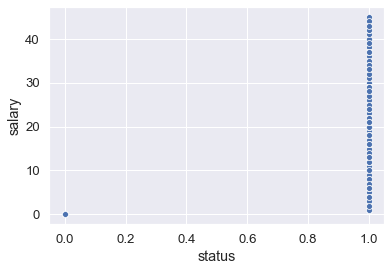

In [75]:
sb.scatterplot(x = encode_y["status"], y = X["salary"])